In [2]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("stream_classify_preprocessing.csv", index_col=0)
data.head(10)

,STREAM_PLACEMENT_DESC,GENDER,HOMELESS,PWD,CALD,REFUGEE,AGE_GROUP,UE_GROUP,EDUCATION_ADJ
0,0,2,0,0,1,0,6,1,9
1,1,2,1,0,0,0,3,3,5
2,1,1,0,1,0,0,4,4,2
3,1,2,1,1,0,0,4,3,3
4,0,2,0,0,0,0,1,1,3
5,1,1,0,1,0,0,2,4,4
6,0,2,0,0,0,0,3,1,4
7,1,1,1,1,0,0,3,4,2
8,1,1,0,1,0,0,5,2,3
9,0,1,0,1,0,0,4,2,7


In [4]:
data_x = data[["GENDER","HOMELESS","PWD","CALD","REFUGEE","AGE_GROUP","UE_GROUP","EDUCATION_ADJ"]]
data_y = data[["STREAM_PLACEMENT_DESC"]]

In [5]:
x_train, x_valid, y_train, y_valid = train_test_split(data_x, data_y, test_size=0.2, random_state=1)

print(f"Data before splitting: {len(data_x)}")
print(f"Train data: {len(x_train)}")
print(f"Validation data: {len(x_valid)}")

Data before splitting: 485972
Train data: 388777
Validation data: 97195


In [6]:
EPOCH = 15
LEARNING_RATE = 1e-3

In [7]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=EPOCH, validation_data=(x_valid, y_valid), batch_size=1024)

Epoch 1/15


2023-12-16 05:04:42.419954: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-16 05:04:42.463277: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-16 05:04:42.463345: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-16 05:04:42.467264: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-16 05:04:42.467331: I tensorflow/compile

380/380 [==============================] - 6s 11ms/step - loss: 0.5569 - accuracy: 0.7504 - val_loss: 0.4474 - val_accuracy: 0.7843
Epoch 2/15
380/380 [==============================] - 4s 9ms/step - loss: 0.4424 - accuracy: 0.7837 - val_loss: 0.4392 - val_accuracy: 0.7842
Epoch 3/15
380/380 [==============================] - 3s 9ms/step - loss: 0.4397 - accuracy: 0.7848 - val_loss: 0.4383 - val_accuracy: 0.7866
Epoch 4/15
380/380 [==============================] - 3s 8ms/step - loss: 0.4390 - accuracy: 0.7849 - val_loss: 0.4369 - val_accuracy: 0.7866
Epoch 5/15
380/380 [==============================] - 3s 8ms/step - loss: 0.4384 - accuracy: 0.7851 - val_loss: 0.4370 - val_accuracy: 0.7871
Epoch 6/15
380/380 [==============================] - 3s 8ms/step - loss: 0.4381 - accuracy: 0.7850 - val_loss: 0.4370 - val_accuracy: 0.7858
Epoch 7/15
380/380 [==============================] - 3s 8ms/step - loss: 0.4377 - accuracy: 0.7851 - val_loss: 0.4361 - val_accuracy: 0.7869
Epoch 8/15
380/3

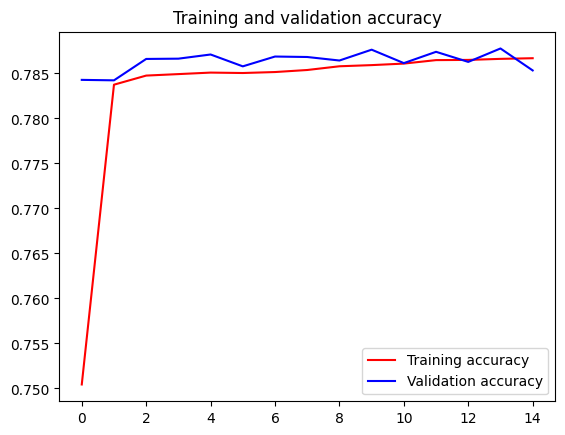

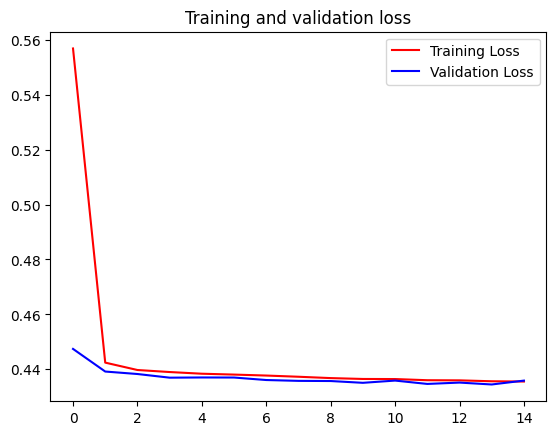

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
# model.predict([[2,0,0,1,0,6,1,9]]) #0
# model.predict([[2,1,0,0,0,3,3,5]]) #harusnya 1
# model.predict([[1,0,1,0,0,4,4,2]]) #1
model.predict([[2,1,1,0,0,4,3,3]]) #1

1/1 [==============================] - 0s 32ms/step


array([[0.56033313]], dtype=float32)

In [13]:
saved_model = "model_stream_classify.h5"
model.save(saved_model)